<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/An%C3%A1lise_Op%C3%A7%C3%A3o_CRFB3V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vectorbt

In [3]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import vectorbt as vbt
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Parâmetros
inicio = '2022-09-20'
fim = '2023-09-20'
# fim = date.today()
ticker = 'CRFB3.SA'
fonte = 'yahoo'
Selic = 12.75


In [6]:
Ativo = yf.download(ticker, start=inicio)
Ativo

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-20,20.670000,21.830000,20.670000,21.510000,21.132994,9527200
2022-09-21,21.600000,22.070000,21.190001,21.400000,21.024921,5404400
2022-09-22,21.700001,21.860001,21.120001,21.639999,21.260715,4412400
2022-09-23,21.290001,21.590000,20.760000,20.950001,20.582809,5635200
2022-09-26,20.740000,20.900000,20.240000,20.270000,19.914728,1971800
...,...,...,...,...,...,...
2023-09-25,9.110000,9.260000,8.920000,8.920000,8.920000,9917500
2023-09-26,8.850000,8.890000,8.600000,8.710000,8.710000,8161000
2023-09-27,8.720000,9.040000,8.630000,8.850000,8.850000,11446900


In [7]:
Ativo_Ajustado = Ativo.drop(Ativo.columns[[0,1,2,3,5]],axis=1)
Ativo_Ajustado.head(2)

,Adj Close
Date,
2022-09-20,21.132994
2022-09-21,21.024921


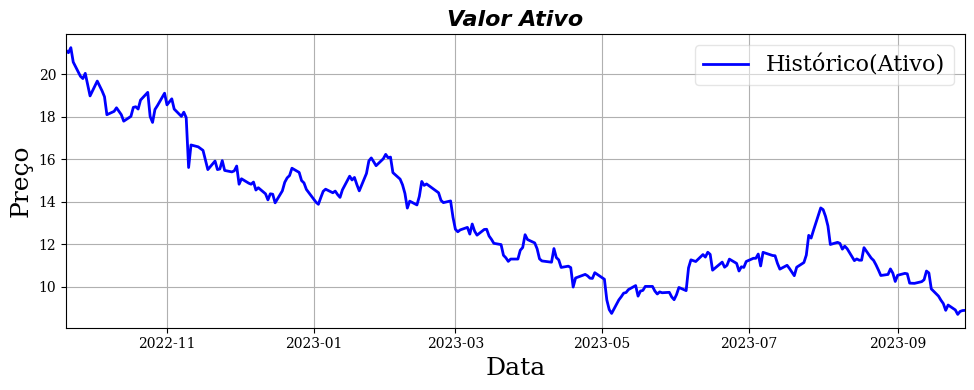

In [9]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,4))
plt.title('Valor Ativo', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Preço',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Ativo_Ajustado['Adj Close'],label='Histórico(Ativo)', color='blue', linewidth=2)
plt.legend(fontsize=16, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

In [10]:
Ativo_Ajustado.describe()

,Adj Close
count,258.000000
mean,13.214902
std,3.046943
min,8.710000
25%,10.902235
50%,12.270813
75%,15.123350
max,21.260715


#Cálculo da Volatilidade

In [20]:
Volatilidade = Ativo_Ajustado['Adj Close'].std()
Volatilidade

3.0469434603423275

<Axes: xlabel='Date'>

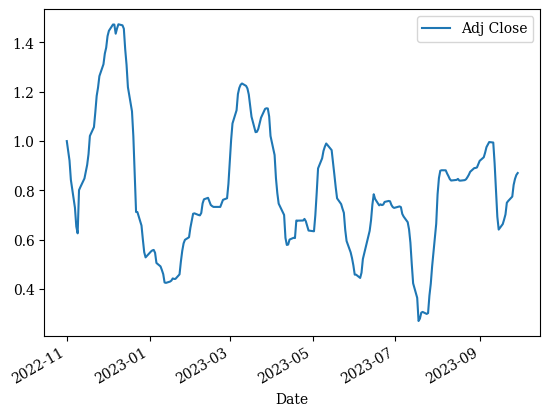

In [22]:
MM_Volat = Ativo_Ajustado.rolling(window=30).std()
MM_Volat.plot()

In [13]:
Ativo1 = Ativo_Ajustado.tail(1)
Ativo1

,Adj Close
Date,
2023-09-29,8.9


In [24]:
#Último valor do ativo
Ativo1['Adj Close'].values[0]

8.899999618530273

In [33]:
#De outra forma ...
Ativo = Ativo1.at[Ativo1.index[-1],'Adj Close']
Ativo

8.899999618530273

In [25]:
# Máximo valor para dois desvios padrâo
Ativo_Máximo = Ativo + 2*Vol
Ativo_Máximo

14.993886539214929

In [26]:
# Mínimo valor para dois desvios padrâo
Ativo_Mínimo = Ativo - 2*Vol
Ativo_Mínimo

2.8061126978456183

<Axes: ylabel='Frequency'>

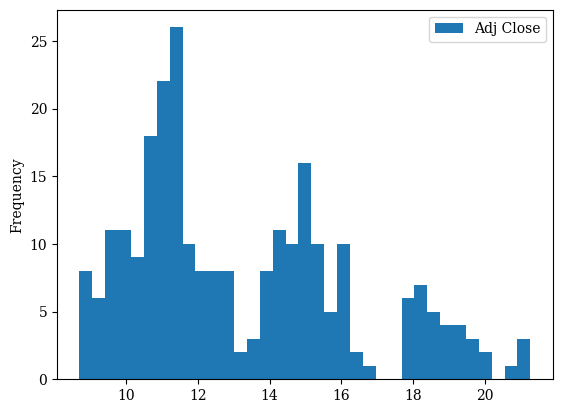

In [27]:
Ativo_Ajustado.plot.hist(bins=35)

In [37]:
div = vbt.YFData.download(ticker,start = inicio).get('Dividends')
div.tail()

Date
2023-09-25 03:00:00+00:00    0.0
2023-09-26 03:00:00+00:00    0.0
2023-09-27 03:00:00+00:00    0.0
2023-09-28 03:00:00+00:00    0.0
2023-09-29 03:00:00+00:00    0.0
Name: Dividends, dtype: float64

In [31]:
# Soma de dividendos (R$) no último ano
Soma_Div = div.sum()
Soma_Div

0.22050799999999998

In [38]:
#De outra forma ...
Soma_Div1 = div.rolling('365D').sum()
Soma_Div1.tail()

Date
2023-09-25 03:00:00+00:00    0.220508
2023-09-26 03:00:00+00:00    0.220508
2023-09-27 03:00:00+00:00    0.220508
2023-09-28 03:00:00+00:00    0.220508
2023-09-29 03:00:00+00:00    0.220508
Name: Dividends, dtype: float64

In [40]:
# Dividend Yeild
DVY = Soma_Div/Ativo
DVY

0.02477618083723179

In [41]:
Valor_Empresa = Soma_Div/(Selic)
Valor_Empresa

0.017294745098039216

# Análise dos Prêmios

In [22]:
#Opções =pd.read_excel("NTCO3_22_09_23.xlsx", sheet_name = 'Planilha2')
#Opções =pd.read_excel("NTCO3_22_09_23.xlsx", sheet_name = 1, usecols=[5,6])
#Opções =pd.read_excel("NTCO3_22_09_23.xlsx", sheet_name = 1, usecols="A:G")
#Opções =pd.read_excel("NTCO3_22_09_23.xlsx", sheet_name = 1, usecols="A:G", skiprows=7) /Para pular as 7 linhas iniciais
#Opções =pd.read_excel("NTCO3_22_09_23.xlsx", sheet_name = 1, usecols="A:G", nrows=7) /Para pegar as 7 linhas iniciais
#Opções =pd.read_excel("NTCO3_22_09_23.xlsx", sheet_name = None)  /Para ler todas as abas da planilha
#display (Opções['Planilha2'])  /Para lmostrar apenas a Planilha2
#display Opções.to_excel("Nome do Arquivo")  /Para criar um arquivo em Excell

In [42]:
Opções =pd.read_excel("/content/drive/MyDrive/Opções Dados/Opções CRFB3_29_09_23.xlsx",)
Opções.head(5)

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,0.00,2.09,0.99,-0.0039,2.04,-2.04,0.0,0.0,6.87,0.01,0.00,0.01,0.0,-0.0005,-0.01,0.00,0.01
1,0.00,1.70,0.98,-0.0052,1.64,-1.64,0.0,0.0,7.27,0.00,0.10,0.00,0.0,-0.0016,-0.02,0.01,0.00
2,0.00,1.32,0.94,-0.0077,1.24,-1.24,0.0,0.0,7.67,0.00,0.10,0.02,0.0,-0.0039,-0.06,0.03,0.02
3,0.00,0.97,0.85,-0.0111,0.84,-0.84,0.0,0.0,8.07,0.00,0.15,0.06,0.0,-0.0071,-0.15,0.07,0.06
4,0.68,0.67,0.72,-0.0142,0.44,0.24,0.0,0.0,8.47,0.06,0.28,0.10,0.0,-0.0103,-0.30,0.19,0.10


In [43]:
Seleção_de_colunas = Opções.iloc[[1,2,3,4,5,6,7,8],[8,12]]
Seleção_de_colunas.head(3)

,Strike,Intrínseco.1
1,7.27,0.0
2,7.67,0.0
3,8.07,0.0


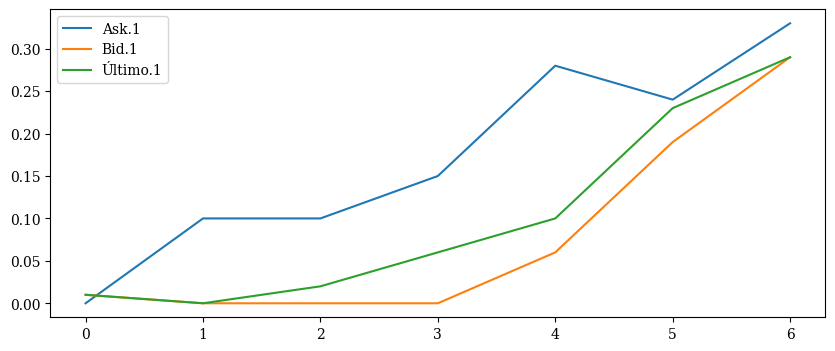

In [45]:
# Ask são os vendedores
# Bid são os compradores
# Último valor negociado
PUTs_OTM = Opções[(Opções['Intrínseco.1']<=0)]
PUTs_OTM[['Ask.1','Bid.1','Último.1']].plot(figsize = (10,4));

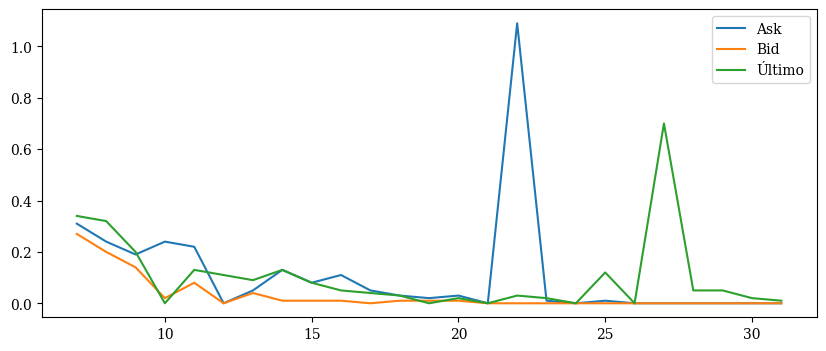

In [47]:
# A mesma análise para as Calls
CALLs_OTM = Opções[(Opções['Intrínseco']<=0)]
CALLs_OTM[['Ask','Bid','Último']].plot(figsize = (10,4));

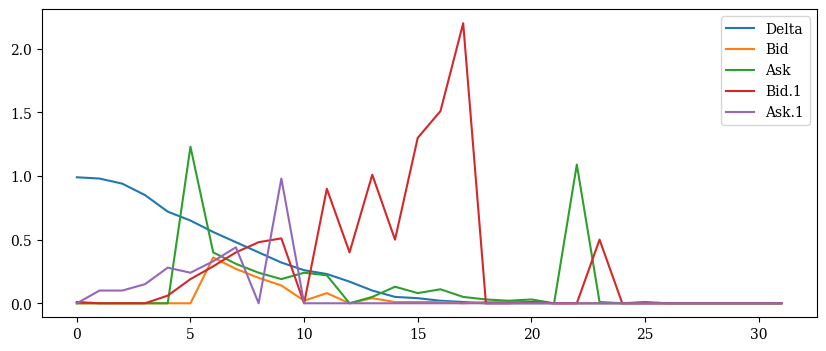

In [32]:
Opções[['Delta', 'Bid','Ask', 'Bid.1','Ask.1']].plot(figsize = (10,4));

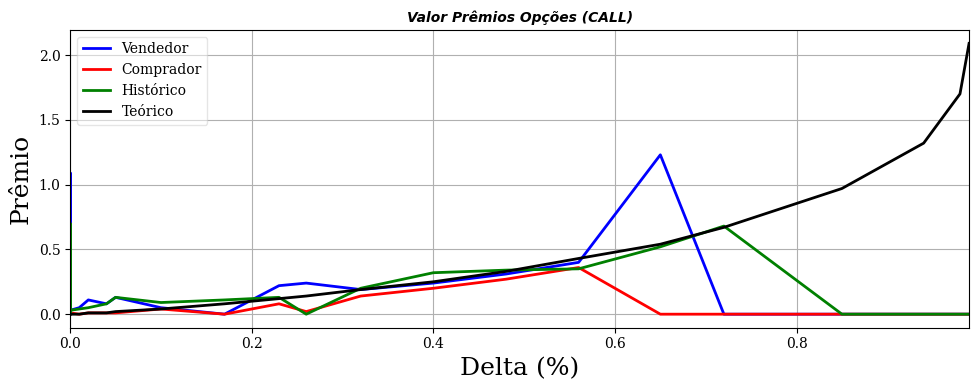

In [50]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Delta'],Opções['Ask'],  label='Vendedor', color='blue', linewidth=2)
plt.plot(Opções['Delta'],Opções['Bid'],  label='Comprador', color='red', linewidth=2)
plt.plot(Opções['Delta'],Opções['Último'],  label='Histórico', color='green', linewidth=2)
plt.plot(Opções['Delta'],Opções['Preço Teórico'],  label='Teórico', color='black', linewidth=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

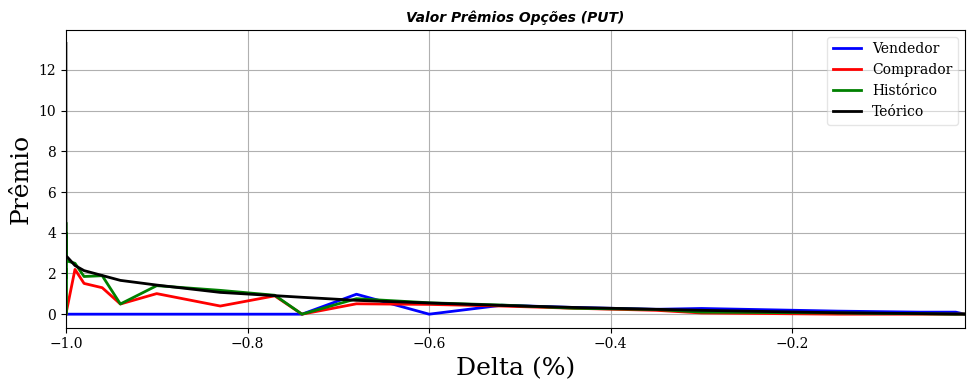

In [52]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,4))
plt.title('Valor Prêmios Opções (PUT)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Delta.1'],Opções['Ask.1'],  label='Vendedor', color='blue', linewidth=2)
plt.plot(Opções['Delta.1'],Opções['Bid.1'],  label='Comprador', color='red', linewidth=2)
plt.plot(Opções['Delta.1'],Opções['Último.1'],  label='Histórico', color='green', linewidth=2)
plt.plot(Opções['Delta.1'],Opções['Preço Teórico.1'],  label='Teórico', color='black', linewidth=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

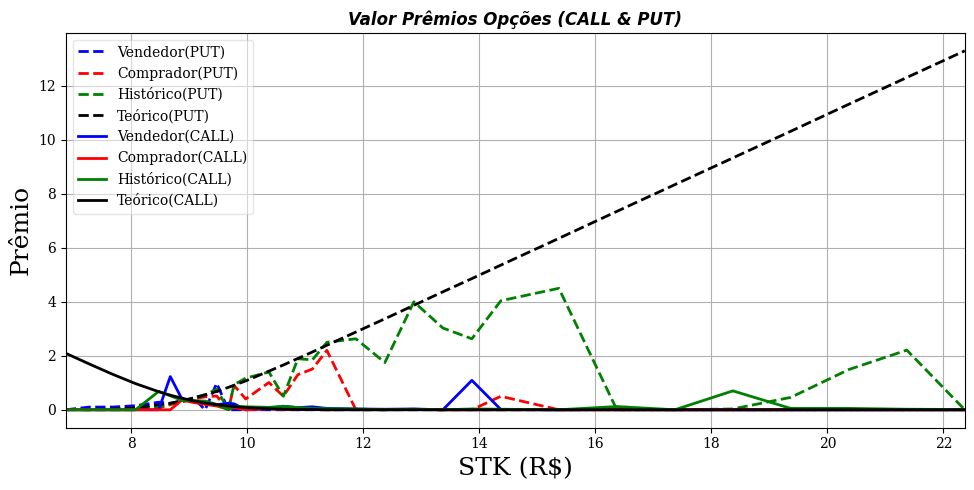

In [54]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,5))
plt.title('Valor Prêmios Opções (CALL & PUT)', fontsize=12, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('STK (R$)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Strike'],Opções['Ask.1'],label='Vendedor(PUT)', color='blue',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Bid.1'],label='Comprador(PUT)', color='red',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Último.1'],label='Histórico(PUT)', color='green',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico.1'],label='Teórico(PUT)', color='black',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Ask'],label='Vendedor(CALL)', color='blue', linewidth=2)
plt.plot(Opções['Strike'],Opções['Bid'],label='Comprador(CALL)', color='red', linewidth=2)
plt.plot(Opções['Strike'],Opções['Último'],label='Histórico(CALL)', color='green', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico'],label='Teórico(CALL)', color='black', linewidth=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

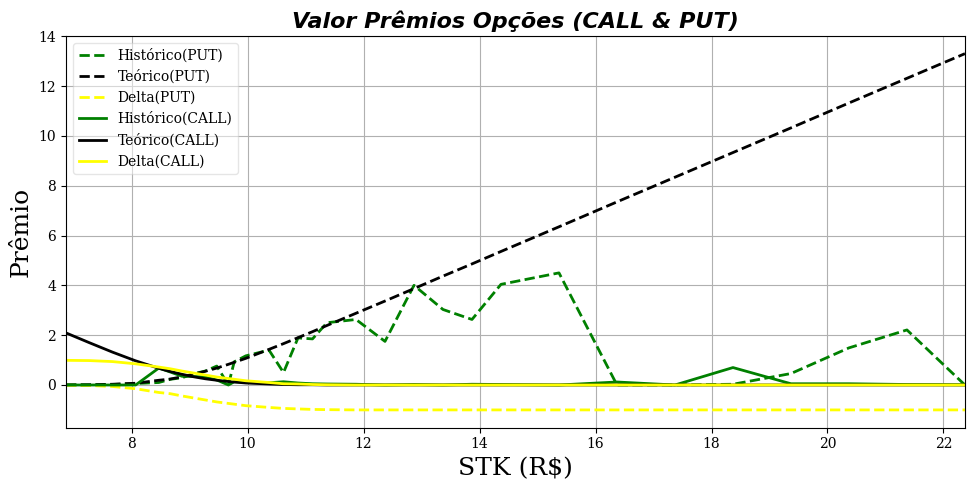

In [55]:
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,5))
plt.title('Valor Prêmios Opções (CALL & PUT)', fontsize=16, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('STK (R$)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(Opções['Strike'],Opções['Último.1'],label='Histórico(PUT)', color='green',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico.1'],label='Teórico(PUT)', color='black',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Delta.1'],label='Delta(PUT)', color='yellow',linestyle='dashed', linewidth=2)
plt.plot(Opções['Strike'],Opções['Último'],label='Histórico(CALL)', color='green', linewidth=2)
plt.plot(Opções['Strike'],Opções['Preço Teórico'],label='Teórico(CALL)', color='black', linewidth=2)
plt.plot(Opções['Strike'],Opções['Delta'],label='Delta(CALL)', color='yellow', linewidth=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

#Conclusões:


In [56]:
PUTs_OTM

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,0.00,2.09,0.99,-0.0039,2.04,-2.04,0.00,0.00,6.87,0.01,0.00,0.01,0.0,-0.0005,-0.01,0.00,0.01
1,0.00,1.70,0.98,-0.0052,1.64,-1.64,0.00,0.00,7.27,0.00,0.10,0.00,0.0,-0.0016,-0.02,0.01,0.00
2,0.00,1.32,0.94,-0.0077,1.24,-1.24,0.00,0.00,7.67,0.00,0.10,0.02,0.0,-0.0039,-0.06,0.03,0.02
3,0.00,0.97,0.85,-0.0111,0.84,-0.84,0.00,0.00,8.07,0.00,0.15,0.06,0.0,-0.0071,-0.15,0.07,0.06
4,0.68,0.67,0.72,-0.0142,0.44,0.24,0.00,0.00,8.47,0.06,0.28,0.10,0.0,-0.0103,-0.30,0.19,0.10
5,0.52,0.54,0.65,-0.0152,0.24,0.28,0.00,1.23,8.67,0.19,0.24,0.23,0.0,-0.0109,-0.35,0.24,0.23
6,0.35,0.43,0.56,-0.0156,0.04,0.31,0.36,0.40,8.87,0.29,0.33,0.29,0.0,-0.0112,-0.44,0.33,0.29


In [67]:
#PUTs_OTM.describe()

In [59]:
P_max = PUTs_OTM.iat[-1,11]
P_max

0.29

In [60]:
Linha_P_max = PUTs_OTM[(PUTs_OTM['Extrínseco.1'] == P_max)]
Linha_P_max

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
6,0.35,0.43,0.56,-0.0156,0.04,0.31,0.36,0.4,8.87,0.29,0.33,0.29,0.0,-0.0112,-0.44,0.33,0.29


In [66]:
# Strike (R$) para o prêmio máximo
Strike_Pmax = Linha_P_max.iat[0,8]
Strike_Pmax

8.87

In [84]:
#Valor do prêmio máximo em percentual
Prêmio_perc = P_max/Strike_Pmax
Prêmio_perc

0.03269447576099211

In [85]:
# Strike (R$) para o menor delta do conjunto
Strike_Deltamin = PUTs_OTM.iat[0,8]
Strike_Deltamin

6.87

In [86]:
# Distância (%) entre o valor do Ativo e do strike do menor delta
Delta_Ativo_perc = (Ativo - Strike_Deltamin)/Ativo
Delta_Ativo_perc

0.2280898545550166

*   A inclinação é a razão entre o cateto oposto e o adjacente (tan)
*   Quanto menor o valor da inclinação, melhor
*   A inclinação para um prêmio de 1% num delta de 25% seria de 4%;
*   A inclinação para um prêmio de 1% num delta de 50% seria de 2%;
*   Se a inclinação é maior (Muito prêmio e pouco Delta);
*   Combinado com baixa volatilidade é uma oportunidade.



In [72]:
Inclinação = Prêmio_perc/Delta_Ativo_perc
Inclinação

0.14334033324181025

In [73]:
Tabela = [[P_max, Strike_Pmax, Prêmio_perc,0, Strike_Deltamin]]

In [74]:
Tabela1 = pd.DataFrame(Tabela, columns=['Prêmio Max (R$)', 'Stk Max (R$)', 'Prêmio(%)', 'D_min(%)', 'Stk_Dmin (R$)'])
print(Tabela1)

   Prêmio Max (R$)  Stk Max (R$)  Prêmio(%)  D_min(%)  Stk_Dmin (R$)
0             0.29          8.87   0.032694         0           6.87


In [75]:
Ativo

8.899999618530273

In [76]:
Opções

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,0.00,2.09,0.99,-0.0039,2.04,-2.04,0.00,0.00,6.87,0.01,0.00,0.01,0.00,-0.0005,-0.01,0.00,0.01
1,0.00,1.70,0.98,-0.0052,1.64,-1.64,0.00,0.00,7.27,0.00,0.10,0.00,0.00,-0.0016,-0.02,0.01,0.00
2,0.00,1.32,0.94,-0.0077,1.24,-1.24,0.00,0.00,7.67,0.00,0.10,0.02,0.00,-0.0039,-0.06,0.03,0.02
3,0.00,0.97,0.85,-0.0111,0.84,-0.84,0.00,0.00,8.07,0.00,0.15,0.06,0.00,-0.0071,-0.15,0.07,0.06
4,0.68,0.67,0.72,-0.0142,0.44,0.24,0.00,0.00,8.47,0.06,0.28,0.10,0.00,-0.0103,-0.30,0.19,0.10
5,0.52,0.54,0.65,-0.0152,0.24,0.28,0.00,1.23,8.67,0.19,0.24,0.23,0.00,-0.0109,-0.35,0.24,0.23
6,0.35,0.43,0.56,-0.0156,0.04,0.31,0.36,0.40,8.87,0.29,0.33,0.29,0.00,-0.0112,-0.44,0.33,0.29
7,0.34,0.33,0.48,-0.0155,0.00,0.34,0.27,0.31,9.07,0.40,0.44,0.29,0.16,-0.0109,-0.52,0.43,0.45
8,0.32,0.25,0.40,-0.0147,0.00,0.32,0.20,0.24,9.27,0.48,0.00,0.20,0.36,-0.0101,-0.60,0.55,0.56
9,0.20,0.19,0.32,-0.0135,0.00,0.20,0.14,0.19,9.47,0.51,0.98,0.20,0.56,-0.0088,-0.68,0.68,0.76


In [77]:
CALLs_OTM1 = Opções[(Opções['Strike']>=Ativo)]
CALLs_OTM1

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
7,0.34,0.33,0.48,-0.0155,0.0,0.34,0.27,0.31,9.07,0.40,0.44,0.29,0.16,-0.0109,-0.52,0.43,0.45
8,0.32,0.25,0.40,-0.0147,0.0,0.32,0.20,0.24,9.27,0.48,0.00,0.20,0.36,-0.0101,-0.60,0.55,0.56
9,0.20,0.19,0.32,-0.0135,0.0,0.20,0.14,0.19,9.47,0.51,0.98,0.20,0.56,-0.0088,-0.68,0.68,0.76
10,0.00,0.14,0.26,-0.0120,0.0,0.00,0.02,0.24,9.67,0.00,0.00,-0.76,0.76,-0.0072,-0.74,0.83,0.00
11,0.13,0.12,0.23,-0.0111,0.0,0.13,0.08,0.22,9.77,0.90,0.00,0.07,0.86,-0.0063,-0.77,0.91,0.93
12,0.11,0.08,0.17,-0.0094,0.0,0.11,0.00,0.00,9.97,0.40,0.00,0.11,1.06,-0.0044,-0.83,1.07,1.17
13,0.09,0.04,0.10,-0.0061,0.0,0.09,0.04,0.05,10.37,1.01,0.00,-0.06,1.46,-0.0010,-0.90,1.43,1.40
14,0.13,0.02,0.05,-0.0038,0.0,0.13,0.01,0.13,10.62,0.50,0.00,-1.21,1.71,0.0009,-0.94,1.66,0.50
15,0.08,0.01,0.04,-0.0031,0.0,0.08,0.01,0.08,10.87,1.30,0.00,-0.07,1.96,0.0023,-0.96,1.90,1.89
16,0.05,0.01,0.02,-0.0021,0.0,0.05,0.01,0.11,11.12,1.51,0.00,-0.36,2.21,0.0035,-0.98,2.14,1.85


Maximo_Call = CALLs_OTM1['Último'].max()
Maximo_Call

In [90]:
#Valor do prêmio máximo em percentual
P_max_call = CALLs_OTM1.iat[0,0]
P_max_call

0.34

In [91]:
Linha_P_maxcall = CALLs_OTM1[(CALLs_OTM1['Último'] == P_max_call)]
Linha_P_maxcall

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
7,0.34,0.33,0.48,-0.0155,0.0,0.34,0.27,0.31,9.07,0.4,0.44,0.29,0.16,-0.0109,-0.52,0.43,0.45


In [92]:
# Strike (R$) para o prêmio máximo
Strike_Pmaxcall = Linha_P_maxcall.iat[0,8]
Strike_Pmaxcall

9.07

In [93]:
#Valor do prêmio máximo em percentual
Prêmio_percall = P_max_call/Strike_Pmaxcall
Prêmio_percall

0.037486218302094816

In [98]:
# Separando os deltas menores que Zero
Deltas_Mínimos = CALLs_OTM1[(CALLs_OTM1['Delta']<=0)]
Deltas_Mínimos

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
18,0.03,0.0,0.0,-0.0005,0.0,0.03,0.01,0.03,11.87,0.00,0.0,-0.33,2.96,0.0054,-1.0,2.88,2.63
19,0.00,0.0,0.0,-0.0002,0.0,0.00,0.01,0.02,12.37,0.00,0.0,-1.71,3.46,0.0060,-1.0,3.37,1.75
20,0.02,0.0,0.0,-0.0001,0.0,0.02,0.01,0.03,12.87,0.01,0.0,0.04,3.96,0.0064,-1.0,3.87,4.00
21,0.00,0.0,0.0,0.0000,0.0,0.00,0.00,0.00,13.37,0.00,0.0,-1.43,4.46,0.0066,-1.0,4.37,3.03
22,0.03,0.0,0.0,0.0000,0.0,0.03,0.00,1.09,13.87,0.00,0.0,-2.33,4.96,0.0069,-1.0,4.86,2.63
23,0.02,0.0,0.0,0.0000,0.0,0.02,0.00,0.01,14.37,0.50,0.0,-1.42,5.46,0.0072,-1.0,5.36,4.04
24,0.00,0.0,0.0,0.0000,0.0,0.00,0.00,0.00,15.37,0.00,0.0,-1.96,6.46,0.0077,-1.0,6.35,4.50
25,0.12,0.0,0.0,0.0000,0.0,0.12,0.00,0.01,16.37,0.00,0.0,-7.46,7.46,0.0082,-1.0,7.35,0.00
26,0.00,0.0,0.0,0.0000,0.0,0.00,0.00,0.00,17.37,0.00,0.0,-8.46,8.46,0.0087,-1.0,8.34,0.00
27,0.70,0.0,0.0,0.0000,0.0,0.70,0.00,0.00,18.37,0.00,0.0,-9.43,9.46,0.0092,-1.0,9.33,0.03


In [99]:
Strike_Deltamincall = Deltas_Mínimos.iat[0,8]
Strike_Deltamincall

11.87

In [101]:
# Distância (%) entre o valor do Ativo e do strike do menor delta
Deltacall_Ativo_perc = -(Ativo - Strike_Deltamincall)/Ativo
Deltacall_Ativo_perc

0.3337079223336175

In [102]:
Inclinaçãocall = Prêmio_percall/Deltacall_Ativo_perc
Inclinaçãocall

0.11233241944019164

In [103]:
Tabela2 = [[P_max_call, Strike_Pmaxcall, Prêmio_percall, 0, Strike_Deltamincall]]

In [110]:
Tabela3 = [['PUT',P_max, Strike_Pmax, Prêmio_perc*100, Inclinação, Strike_Deltamin],
            ['CALL',P_max_call, Strike_Pmaxcall, Prêmio_percall*100, Inclinaçãocall, Strike_Deltamincall]]

Tabela_Final = pd.DataFrame(Tabela3, columns=['Tipo','Prêmio Max (R$)', 'Stk Max (R$)', 'Prêmio(%)', 'Inclin(%)', 'Stk_Dmin (R$)'])

print(Tabela_Final)

   Tipo  Prêmio Max (R$)  Stk Max (R$)  Prêmio(%)  Inclin(%)  Stk_Dmin (R$)
0   PUT             0.29          8.87   3.269448   0.143340           6.87
1  CALL             0.34          9.07   3.748622   0.112332          11.87
